# **Import Libraries**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

# **Loading data**

In [13]:
df = pd.read_csv("LoanDefault.csv")
print(df)

      Unnamed: 0  PROPERTY_VALUE_AMT  TARGET  CRDT_LINE_CNT  DEROG_CNT  \
0              0             91704.0       0           20.0        0.0   
1              1             88342.0       0           11.0        0.0   
2              2            242602.0       0           26.0        0.0   
3              3             68500.0       0           42.0        0.0   
4              4             55500.0       0           11.0        0.0   
...          ...                 ...     ...            ...        ...   
5955        5955            171916.0       0           16.0        0.0   
5956        5956            181157.0       0           19.0        1.0   
5957        5957            167302.0       0           24.0        0.0   
5958        5958            111304.0       0           14.0        0.0   
5959        5959             72082.0       0           21.0        0.0   

      DEBT_INC_RTIO_AMT  LOAN_AMT REASON_CDE  YOJ_AMT  MORTGAGE_DUE_AMT  \
0             30.206893     20000   

In [14]:
df.head()

,Unnamed: 0,PROPERTY_VALUE_AMT,TARGET,CRDT_LINE_CNT,DEROG_CNT,DEBT_INC_RTIO_AMT,LOAN_AMT,REASON_CDE,YOJ_AMT,MORTGAGE_DUE_AMT,RCNT_CRDT_CNT,OLD_AGE_TRADE_AMT,JOB_CDE,DELINGQ_CNT
0,0,91704.0,0,20.0,0.0,30.206893,20000,DebtCon,10.0,28440.0,0.0,143.637439,ProfExe,0.0
1,1,88342.0,0,11.0,0.0,43.717635,4800,HomeImp,7.0,80482.0,0.0,275.032395,ProfExe,0.0
2,2,242602.0,0,26.0,0.0,41.277127,25700,DebtCon,8.0,197425.0,2.0,102.960346,Other,0.0
3,3,68500.0,0,42.0,0.0,NaN,18000,DebtCon,10.0,45000.0,1.0,190.800000,ProfExe,0.0
4,4,55500.0,0,11.0,0.0,NaN,8600,DebtCon,6.0,41126.0,1.0,73.033333,Other,0.0


In [15]:
df.isnull().sum()

Unnamed: 0               0
PROPERTY_VALUE_AMT     112
TARGET                   0
CRDT_LINE_CNT          222
DEROG_CNT              708
DEBT_INC_RTIO_AMT     1267
LOAN_AMT                 0
REASON_CDE             252
YOJ_AMT                515
MORTGAGE_DUE_AMT       518
RCNT_CRDT_CNT          510
OLD_AGE_TRADE_AMT      308
JOB_CDE                279
DELINGQ_CNT            580
dtype: int64

# **Convert missing values to NaN**

In [16]:
df = df.replace("?", np.nan)

# **Convert categorical variables to numeric**

In [17]:
df["REASON_CDE"] = df["REASON_CDE"].astype("category").cat.codes
df["JOB_CDE"] = df["JOB_CDE"].astype("category").cat.codes

# **Separate features and target**

In [18]:
X = df.drop("TARGET", axis=1)
y = df["TARGET"]


# **Imputation of missing values**

In [19]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


# **Split data into train and test sets**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# **Create and train a SVC model**

In [21]:
# Create and Train an SVC Model
model = SVC(probability=True)
model.fit(X_train, y_train)


SVC(probability=True)

# **Predict the probability of loan default for the test set**

In [22]:
y_pred = model.predict_proba(X_test)[:, 1]

# **Evaluate the model's performance**

In [23]:
print("Accuracy:", model.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7993288590604026
AUC: 0.5973807521326445


# **ROC Curve**

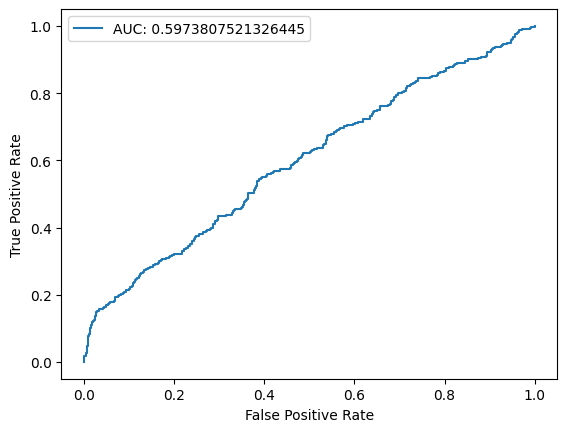

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="AUC: " + str(roc_auc_score(y_test, y_pred)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



# **Classification Report**

In [25]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1189
           1       1.00      0.01      0.01       301

    accuracy                           0.80      1490
   macro avg       0.90      0.50      0.45      1490
weighted avg       0.84      0.80      0.71      1490



# **Confusion Matrix**

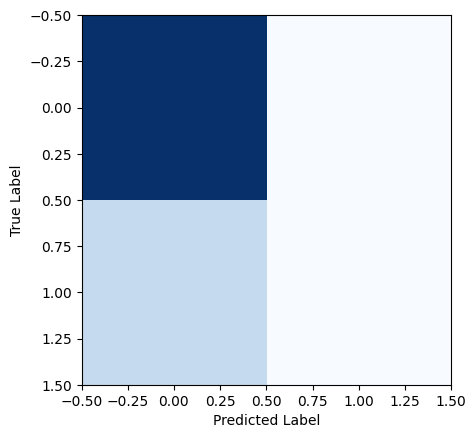

In [26]:
cm = confusion_matrix(y_test, model.predict(X_test))
plt.imshow(cm, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


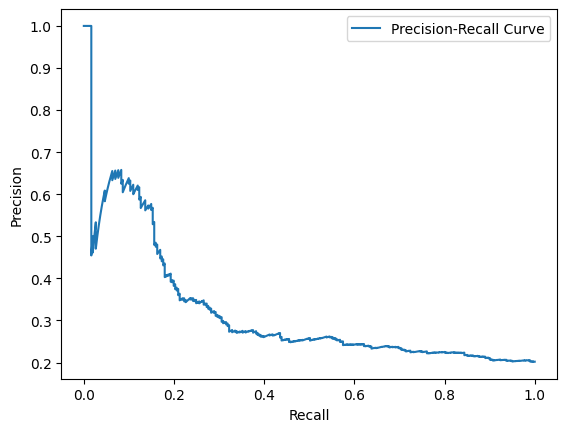

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


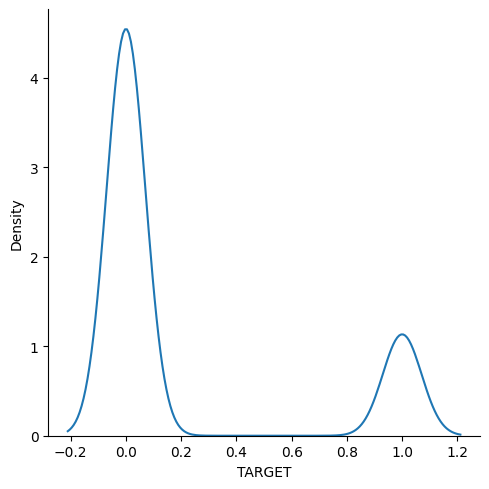

In [28]:
import seaborn as sns

sns.displot(data=df, x="TARGET", kind="kde")
plt.show()


# **Visualize correlation matrix**

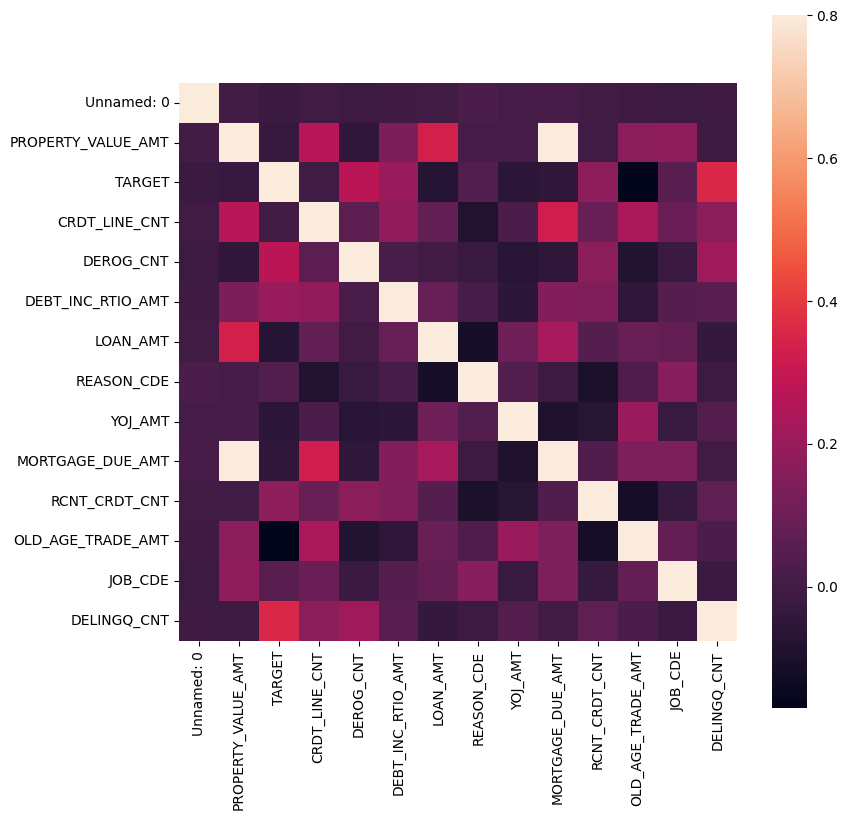

In [29]:



corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True, ax=ax)
plt.show()


# **Visualising the Training set results**

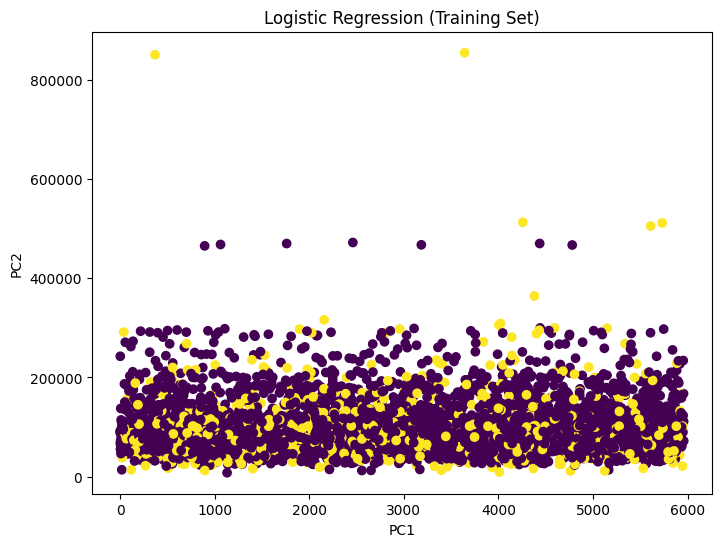

In [30]:

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Logistic Regression (Training Set)")
plt.show()